In [70]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict

import sys
sys.path.append('../..')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt

# Machine learning imports
# import sklearn
# import tensorflow as tf
# import keras
import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad

# Internal Imports
from src.utils import dictmap_load

In [71]:
dict_dataframes_index = dictmap_load(path = "../../data/interim/clean_data_index.xlsx")   
#dict_dataframes_index['csi300 index data'].info()

In [72]:
data = dict_dataframes_index['csi300 index data'].drop(['date'],axis=1,inplace=True)
data = dict_dataframes_index['csi300 index data']
data.head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [155]:
print(len(dict_dataframes_index['csi300 index data'].columns))
print(dict_dataframes_index['csi300 index data'].columns)

19
Index(['open', 'high', 'low', 'close', 'volume', 'us dollar index', 'shibor',
       'macd', 'cci', 'atr', 'boll', 'ema20', 'ma10', 'mtm6', 'ma5', 'mtm12',
       'roc', 'smi', 'wvad'],
      dtype='object')


In [156]:
# Wavelet Transform across Horizontal Axis

# Multi-level wavelet transform
    # https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html#pywt.wavedec
w = pywt.Wavelet('haar')
coeffs = wavedec(data, w, level=2,axis=0)
cA2, cD2, cD1 = coeffs
# cA = Approximation coefficients
    # Approximation (low pass)
# cD = Detail coefficient(s)
    # Detail (high pass)
    # Detail cofficients represent the high freq part of the signal  

In [175]:
# Alernate Wavelet Transform across Vertical Axis
coeffs_alt = wavedec(data, w, level=2,axis=1)
cA2_alt, cD2_alt, cD1_alt = coeffs_alt


In [176]:
print(len(cA2),len(cD2),len(cD1))
print(len(cA2_alt),len(cD2_alt),len(cD1_alt))

503 503 1005
2010 2010 2010


In [177]:
print(cA2.shape)
print(cD2.shape)
print(cD1.shape)
print("==================")
print(cA2_alt.shape)
print(cD2_alt.shape)
print(cD1_alt.shape)

(503, 19)
(503, 19)
(1005, 19)
(2010, 5)
(2010, 5)
(2010, 10)


In [217]:
# test concat of dataframe from wavelet denoise along vertical axis
frames = [pd.DataFrame(cA2_alt), pd.DataFrame(cD2_alt), pd.DataFrame(cD1_alt)]
vertical_df_test = pd.concat(frames,axis=1)
len(vertical_df_test)

2010

In [218]:
vertical_df_test.head(3)

,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9
0,5498.555,144188.806018,3098.737421,2665.1063,-8.726279e+07,110.025,144399.383982,-3108.486472,94.5501,8.726278e+07,-7.198347,-5.777062,203960.361910,152.437489,-175.467877,98.802257,2080.905231,2214.726462,-6.594957,0.0
1,5409.115,139512.315776,3039.246487,2607.2290,-1.095493e+08,39.455,139723.324224,-3103.091175,62.5358,1.095493e+08,-30.624795,-20.887934,197347.605359,153.057540,-152.448466,97.926587,2103.218976,2156.663803,-6.032495,0.0
2,5420.015,228235.707397,3083.148915,2641.5633,-5.855737e+07,42.145,228440.072603,-3004.837971,-29.6519,5.855737e+07,-108.328759,-101.363757,322815.685089,148.151320,-213.926004,91.996413,2142.364831,2004.890404,-2.019218,0.0


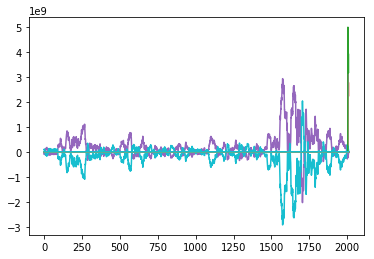

In [220]:
plt.plot(vertical_df_test)

In [178]:
pd.DataFrame(cA2).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5453.76,5573.425,5346.760,5450.205,701666.325,144.885,5.1819,-417.255691,-231.389668,226.6620,6248.020462,5985.488387,5652.11220,-345.9460,5570.1945,-432.4500,-14.603742,-0.086456,-1.650223e+08
1,5773.08,5951.155,5732.940,5886.730,1189933.120,145.375,5.0683,-303.833331,193.673349,233.6690,6015.778269,5899.670469,5650.36285,383.8370,5658.7340,254.4290,9.064430,0.026143,3.165430e+07
2,5847.96,5903.670,5691.375,5763.975,827790.090,143.815,4.7673,-195.594683,56.235154,226.3405,5831.768385,5891.099127,5729.20800,120.4395,5881.9903,-15.1685,-0.526099,0.098162,1.743520e+08


In [179]:
pd.DataFrame(cA2_alt).head(3)

,0,1,2,3,4
0,5498.555,144188.806018,3098.737421,2665.1063,-8.726279e+07
1,5409.115,139512.315776,3039.246487,2607.2290,-1.095493e+08
2,5420.015,228235.707397,3083.148915,2641.5633,-5.855737e+07


In [180]:
pd.DataFrame(cD1).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,68.285302,44.858854,14.226988,-0.883883,6613.004039,0.247487,-0.157826,0.462224,7.615990,30.635401,23.378582,22.502912,20.624608,42.938352,38.175281,-19.887378,-0.612971,-0.050508,1.575896e+07
1,-68.398439,16.850355,-69.833866,13.265323,54838.216846,0.014142,0.009192,-4.371506,-21.294887,86.690584,25.411732,15.966482,7.623742,21.305127,10.489081,118.339270,3.854745,-0.009910,1.139691e+07
2,-108.159053,-34.047192,-66.086200,-13.491597,-10720.120640,-0.176777,0.012587,-12.724098,-45.186541,36.106994,19.295557,3.199604,-3.530301,-30.603581,-28.778397,40.668539,1.502307,0.023686,-5.060062e+06


In [181]:
pd.DataFrame(cD1_alt).head(3)

,0,1,2,3,4,5,6,7,8,9
0,-7.198347,-5.777062,203960.361910,152.437489,-175.467877,98.802257,2080.905231,2214.726462,-6.594957,0.0
1,-30.624795,-20.887934,197347.605359,153.057540,-152.448466,97.926587,2103.218976,2156.663803,-6.032495,0.0
2,-108.328759,-101.363757,322815.685089,148.151320,-213.926004,91.996413,2142.364831,2004.890404,-2.019218,0.0


In [182]:
pd.DataFrame(cD2).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,48.07,-18.105,13.48,-52.255,-133986.825,-0.555,0.0425,-9.555123,-37.279072,-31.587,65.868615,50.184091,21.22100,102.034,78.4699,-100.965,-3.378596,-0.037968,-3.178985e+07
1,-124.90,-121.025,-144.26,-102.130,-120132.100,0.295,0.0497,-42.945891,-86.354396,13.534,49.447538,-5.489996,-6.69625,-207.073,-104.7668,-92.569,-3.278158,-0.038239,-9.512131e+07


In [183]:
pd.DataFrame(cD2_alt).head(2)

,0,1,2,3,4
0,110.025,144399.383982,-3108.486472,94.5501,8.726278e+07
1,39.455,139723.324224,-3103.091175,62.5358,1.095493e+08


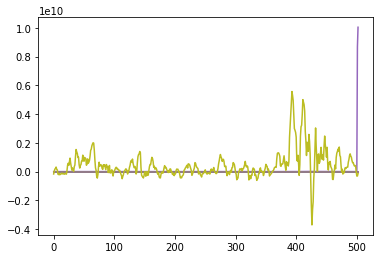

In [184]:
plt.plot(cA2);

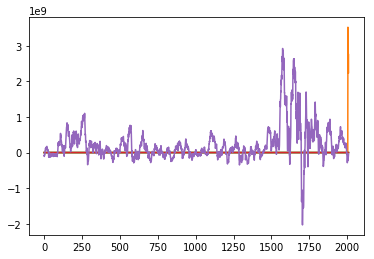

In [185]:
plt.plot(cA2_alt);

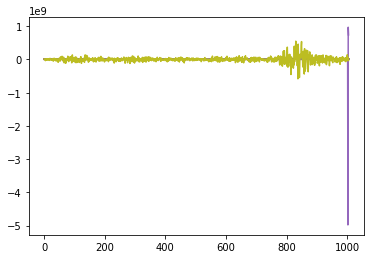

In [186]:
plt.plot(cD1);

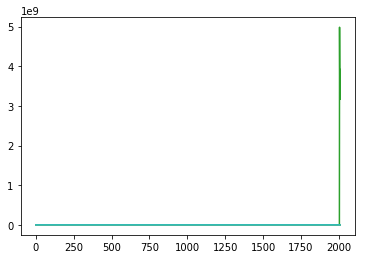

In [187]:
plt.plot(cD1_alt);

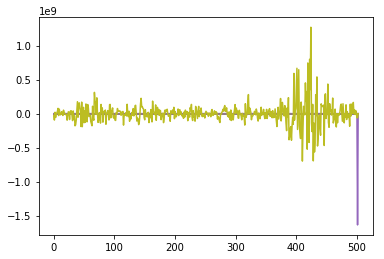

In [188]:
plt.plot(cD2);

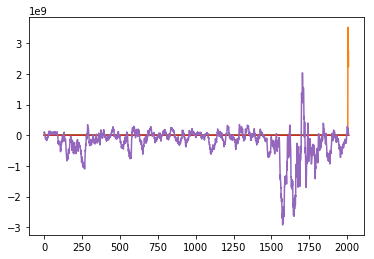

In [189]:
plt.plot(cD2_alt);

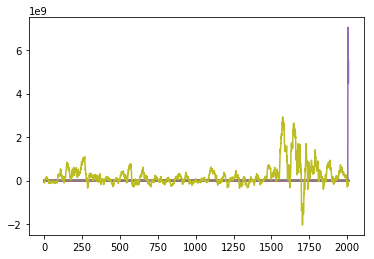

In [190]:
plt.plot(data);

In [226]:
reconstructed_signal = pywt.waverec(coeffs, 'haar',axis=0)
len(reconstructed_signal)


2010

In [225]:
reconstructed_signal_alt = pywt.waverec(coeffs_alt, 'haar',axis=1)
len(reconstructed_signal_alt)

2010

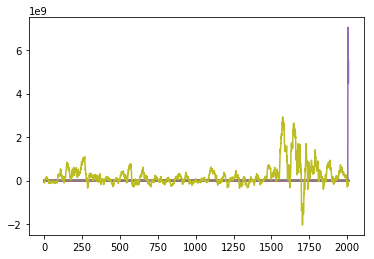

In [224]:
plt.plot(data);

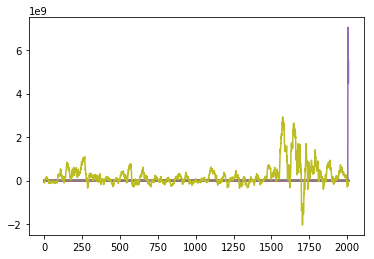

In [223]:
plt.plot(reconstructed_signal);

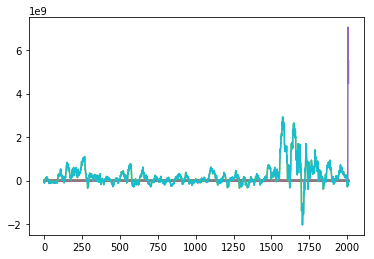

In [222]:
plt.plot(reconstructed_signal_alt);

In [196]:
pd.DataFrame(reconstructed_signal).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08


In [221]:
pd.DataFrame(reconstructed_signal_alt).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08,-1.095493e+08


In [198]:
data.head(2)

,open,high,low,close,volume,us dollar index,shibor,macd,cci,atr,boll,ema20,ma10,mtm6,ma5,mtm12,roc,smi,wvad
0,2799.20,2809.38,2690.18,2698.35,288515.85,72.34,2.5006,-213.078565,-128.949052,119.200,3173.475692,3033.748201,2851.2504,-91.594,2851.3262,-280.770,-9.424605,-0.097927,-8.726278e+07
1,2702.63,2745.94,2670.06,2699.60,279163.65,71.99,2.7238,-213.732249,-139.719688,75.875,3140.413385,3001.924277,2822.0828,-152.318,2797.3382,-252.645,-8.557733,-0.026497,-1.095493e+08
